# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Gloria Laura
- **Email:**  m004b4kx1638@bangkit.academy
- **ID Dicoding:** gloria_laura_21Qg

## Menentukan Pertanyaan Bisnis


*   Bagaimana persebaran peminjaman sepeda perharinya?
*   Bagaimana pola peminjaman sepeda dengan berdasarkan pengaruh waktu (perjam)?



## Import Semua Packages/Library yang Digunakan

In [11]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Data Wrangling

##Gathering Data

In [12]:
# Data day.csv
day_df= pd.read_csv('/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
# Data hour.csv
hour_df = pd.read_csv('/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data terdiri dari 2 file csv berupa data peminjaman sepeda berdasarkan hari dan jam
- Data berisi keterangan cuaca dan hari libur

##Assessing Data

**Assessing Data day_df**

In [14]:
# Cek info data day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [15]:
# Cek missing value data day
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [16]:
# Cek statistik deskriptif data day
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [17]:
# Cek jumlah duplikasi pada data day
print("Jumlah duplikasi : ", day_df.duplicated().sum())

Jumlah duplikasi :  0


**Assessing Data hour_df**

In [18]:
# Cek info data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [19]:
# Cek missing value
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [20]:
# Cek statistik deskriptif
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [21]:
# Cek jumlah duplikasi
print("Jumlah duplikasi : ", hour_df.duplicated().sum())

Jumlah duplikasi :  0


Insight:


*   Terdapat kesalahan tipe daya :tipe data dteday pada kedua data bertipe object, seharusnya datetime
*   Tidak ada duplikasi data maupun missing value dan inaccurate value



### Cleaning Data

**Mengubah tipe data dteday pada day_df menjadi tipe data datetime**

In [28]:
day_df_columns=["dteday"]

for column in day_df_columns:
  day_df[column]=pd.to_datetime(day_df[column])

In [29]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Mengubah tipe data dteday pada hour_df menjadi tipe data datetime**

In [30]:
hour_df_columns=["dteday"]

for column in hour_df_columns:
  hour_df[column]=pd.to_datetime(hour_df[column])

In [31]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**


*   Tipe data dteday sudah diubah menjadi tipe data date time
*   Data sudah bersih (tidak ada missing, duplicate, dan inaccurate value)

## Exploratory Data Analysis (EDA)**bold text**

**Eksplorasi Data day_df**

In [32]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [43]:
#grouping berdasarkan hari (weekday)
day_df.groupby(by="weekday").agg({
    "instant":"nunique",
    "cnt": ["max","min","mean","std"]
})

instant   cnt                                
        nunique   max   min         mean          std
weekday                                              
0           105  8227   605  4228.828571  1872.496629
1           105  7525    22  4338.123810  1793.074013
2           104  7767   683  4510.663462  1826.911642
3           104  8173   441  4548.538462  2038.095884
4           104  7804   431  4667.259615  1939.433317
5           104  8362  1167  4690.288462  1874.624870
6           105  8714   627  4550.542857  2196.693009

In [45]:
# Cek nilai max dari masing masing hari
day_df.groupby(["weekday"])["cnt"].max().reset_index()


,weekday,cnt
0,0,8227
1,1,7525
2,2,7767
3,3,8173
4,4,7804
5,5,8362
6,6,8714


In [46]:
# Menyimpan jumlah peminjaman sepeda berdasarkan hari
day_count_df = day_df.groupby(by="weekday")["cnt"].sum().reset_index()
print(day_count_df)

   weekday     cnt
0        0  444027
1        1  455503
2        2  469109
3        3  473048
4        4  485395
5        5  487790
6        6  477807


**Eksplorasi Data hour_df**

In [47]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [49]:
#Grouping berdasarkan jam (hr)
hour_df.groupby(by="hr").agg({
    "instant":"nunique",
    "cnt": ["max","min","mean","std"]
})

instant  cnt                            
   nunique  max min        mean         std
hr                                         
0      726  283   2   53.898072   42.307910
1      724  168   1   33.375691   33.538727
2      715  132   1   22.869930   26.578642
3      697   79   1   11.727403   13.239190
4      697   28   1    6.352941    4.143818
5      717   66   1   19.889819   13.200765
6      725  213   1   76.044138   55.084348
7      727  596   1  212.064649  161.441936
8      727  839   5  359.011004  235.189285
9      727  426  14  219.309491   93.703458
10     727  539   8  173.668501  102.205413
11     727  663  10  208.143054  127.495536
12     728  776   3  253.315934  145.081134
13     729  760  11  253.661180  148.107657
14     729  750  12  240.949246  147.271574
15     729  750   7  251.233196  144.632541
16     730  783  11  311.983562  148.682618
17     730  976  15  461.452055  232.656611
18     728  977  23  425.510989  224.639304
19     728  743  11  311.523352  161.050359
20     728  567  11  226.030220  119.670164
21     728  584   6  172.314560   89.788893
22     728  502   9  131.335165   69.937782
23     728  256   2   87.831044   50.846889

In [50]:
#Cek nilai max
hour_df.groupby(["hr"])["cnt"].max().reset_index()

,hr,cnt
0,0,283
1,1,168
2,2,132
3,3,79
4,4,28
5,5,66
6,6,213
7,7,596
8,8,839
9,9,426


In [51]:
#Menyimpan jumlah peminjaman berdasarkan jam
hour_count_df = hour_df.groupby(by="hr")["cnt"].sum().reset_index()
print(hour_count_df)

    hr     cnt
0    0   39130
1    1   24164
2    2   16352
3    3    8174
4    4    4428
5    5   14261
6    6   55132
7    7  154171
8    8  261001
9    9  159438
10  10  126257
11  11  151320
12  12  184414
13  13  184919
14  14  175652
15  15  183149
16  16  227748
17  17  336860
18  18  309772
19  19  226789
20  20  164550
21  21  125445
22  22   95612
23  23   63941


**Insight:**


*   Dibuat grouping berdasarkan hari dan disimpan dalam variabel day_count_df
*   Dibuat grouping berdasarkan jam dan disimpan dalam variabel hour_count_df





## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana persebaran peminjaman sepeda perharinya?

<ipython-input-75-a9f9f4ec5566>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


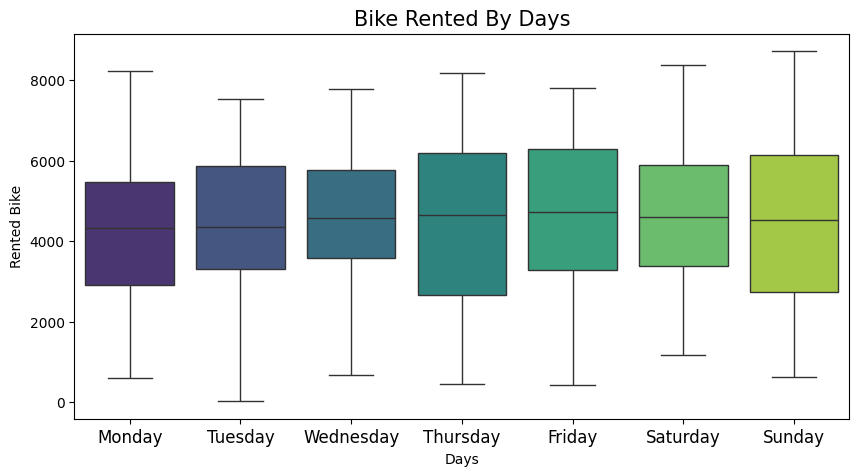

In [75]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(
    y="cnt",
    x="weekday",
    data=day_df,
    palette="viridis",
)
day_label=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.xticks(ticks=range(len(day_label)), labels=day_label)
plt.title("Bike Rented By Days", loc="center", fontsize=15)
plt.xlabel("Days")
plt.tick_params(axis="x", labelsize=12)
plt.ylabel("Rented Bike")

plt.show()

##Pertanyaan 2: Bagaimana pola peminjaman sepeda dengan berdasarkan pengaruh waktu (perjam)?

<ipython-input-71-9f68df12b247>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(


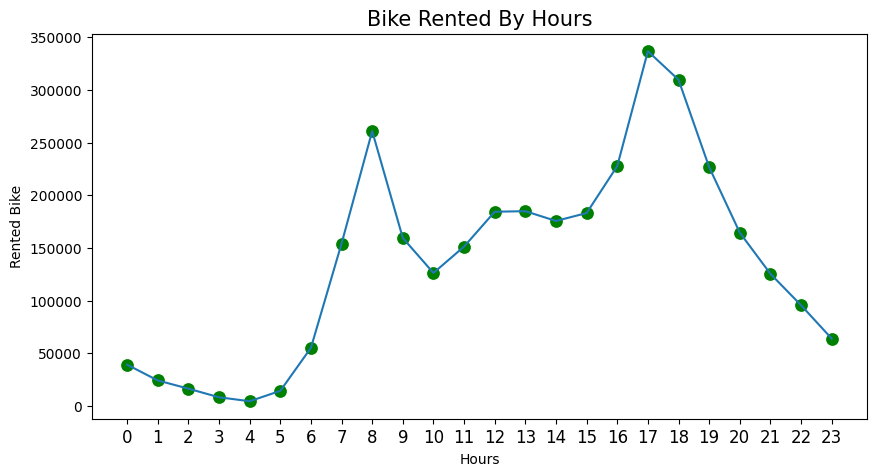

In [71]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(
    y="cnt",
    x="hr",
    data=hour_count_df,
    palette="viridis",
    legend=False
)
sns.scatterplot(
    y="cnt",
    x="hr",
    data=hour_count_df,
    color='green',
    s=100,
    ax=ax
)

hour_label=list(range(0,24))
plt.xticks(ticks=range(len(hour_label)), labels=hour_label)
plt.title("Bike Rented By Hours", loc="center", fontsize=15)
plt.xlabel("Hours")
plt.tick_params(axis="x", labelsize=12)
plt.ylabel("Rented Bike")


plt.show()

**Insight:**

Dari Visualisasi 1 :     
*   Distribusi penyewaan sepeda yang beragam setiap harinya
*   Penyewaan tertinggi berada pada hari Jumat
*   Hari Rabu memiliki median yang lebih rendah
*   Tingkat penyewaan lebih tinggi pada akhir pekan terlihat dari angka median yang lebih tinggi

Dari Visualisasi 2 :  
*   Grafik dibuat berdasarkan jumlah total penyewaan sepeda yang terjadi setiap jamnya
*   Puncak pertama pada gragfik jumlah penyewaan sepeda terjadi pada jam 08.00
*   Jumlah penyewaan tertinggi keseluruhan terjadi pada jam 17.00
*   Jumlah penyewaan terendah terjadi pada jam 04.00
*   Persebaran penyewaaan sepeda berdasarkan jam cukup fluktuatif

##Analisis Lanjutan (Opsional)

Akan dibuat clustering berdasarkan tempratur yang akan dibagi menjadi 3 range yaitu low, medium, dan high dengan range yang didefinisikan :
 
Low = 0-0.3
Medium = 0.3-0.6
High = 0.6-1

In [ ]:
# Grafik Temprature per hari
plt.figure(figsize=(10, 6))
sns.lineplot(x=day_df['dteday'], y=day_df['temp'], palette='viridis')
plt.title('Temprature per day')
plt.xlabel('Date')
plt.ylabel('Temprature')

plt.show

In [79]:
#Didefinisikan aturan pengelompokkan level temprature dengan range berikut
bins=[0,0.3,0.6,1]
labels=['Low', 'Medium', 'High']

#Dilakukan pengelompokkan berdasarkan aturan yang telah dibuat
day_df['temp_range']=pd.cut(day_df['temp'], bins=bins, labels=labels)
print(day_df[['temp','temp_range']].head())

       temp temp_range
0  0.344167     Medium
1  0.363478     Medium
2  0.196364        Low
3  0.200000        Low
4  0.226957        Low


In [85]:
#Menghitung jumlah per range level temprature
temp_counts = day_df['temp_range'].value_counts()
print(temp_counts)

temp_range
Medium    342
High      254
Low       135
Name: count, dtype: int64


<ipython-input-86-b7a71380291d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp_counts.index, y=temp_counts.values, palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

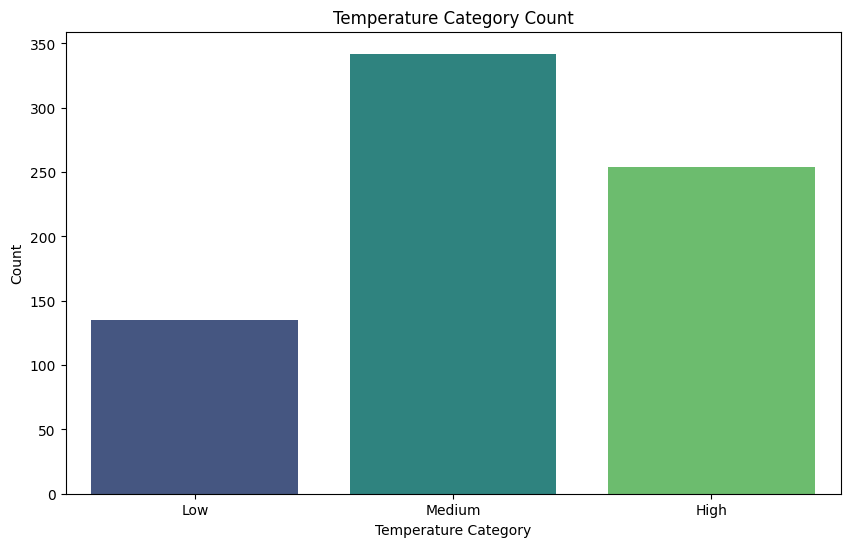

In [86]:
# Bar Plot Count 
plt.figure(figsize=(10, 6))
sns.barplot(x=temp_counts.index, y=temp_counts.values, palette='viridis')
plt.title('Temperature Level Count')
plt.xlabel('Temperature Level')
plt.ylabel('Count')

plt.show

In [87]:
average_rent_by_temp_range = day_df.groupby('temp_range')['cnt'].mean()
print(average_rent_by_temp_range)

temp_range
Low       2381.214815
Medium    4488.178363
High      5654.559055
Name: cnt, dtype: float64


<ipython-input-87-32d702d56f8a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rent_by_temp_range = day_df.groupby('temp_range')['cnt'].mean()


**Insight:**
*   Grafik menunjukkan bahwa jumlah peminjaman sepeda terbanyak terjadi pada kategori suhu Medium.
*   Peminjaman sepeda pada suhu Low paling sedikit, sementara suhu High memiliki jumlah peminjaman yang berada di tengah-tengah.

## Conclusion

*   Persebaran peminjaman sepeda per hari: Peminjaman sepeda cukup merata sepanjang minggu, dengan sedikit peningkatan pada hari Jumat dan Sabtu
*   Pola peminjaman berdasarkan waktu: Peminjaman paling tinggi pada jam sibuk pagi (08.00) dan sore (17.00), menunjukkan kemungkinan penggunaan sepeda sebagai alat transportasi untuk bekerja atau sekolah.

